In [ ]:
#Figure 6 graph plotting 
#v1.0 version, this is the first consolidation of analysis done so far
#Requires the environment packages found in 23pubenv

In [1]:
import tifffile
from matplotlib import pyplot as plt
import numpy as np
from skimage import filters, morphology, measure
from pathlib import Path
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from matplotlib.colors import LinearSegmentedColormap

In [5]:
folder = Path.cwd().parent / 'Data Sets' / '2023_05_03_CGD_Accumulation'
folder

PosixPath('/Users/echo/Documents/Lab Stuff/Publication/23 Protofigures/Data Sets/2023_05_03_CGD_Accumulation')

In [7]:
#Get all the folders needed:
folderpath = Path.cwd().parent / 'Data Sets' / '2023_05_03_CGD_Accumulation'
img_folder = folderpath / 'nuclei'
core_ROI_folder = folderpath / 'nuclei_core_ROI'
seg_folder = folderpath / 'segmented_nuclei'
seg_CORE_folder = folderpath / 'segmented_nuclei_core_ROI'

#Get a list of all the images in each folder: 
img_paths = sorted(img_folder.glob('*.tif'), key= lambda x: x.stem.split('_'))
core_ROI_paths = sorted(core_ROI_folder.glob('*.tif'), key= lambda x: x.stem.split('_'))
seg_paths = sorted(seg_folder.glob('*.tif'), key= lambda x: x.stem.split('_'))
core_ROI_segmentations = sorted(seg_CORE_folder.glob('*.tif'), key= lambda x: x.stem.split('_'))

In [9]:
meta_DF = pd.read_csv(folderpath / 'analysis_DF.csv')

In [10]:
all_wells_DF = pd.read_csv(folderpath / 'cgd-v-control_frame_accumulation_analysis_updated.csv')
all_wells_DF = all_wells_DF[all_wells_DF['accumulation'] != 0] #To match the zstack analysis, we will toss all targets that recorded no accumulation

In [11]:
control_fig6_data = pd.read_csv(folderpath / 'fig6-zstack-analysis-output.csv')

In [12]:
trains_colors = ['#5BCFFA', '#FFFFFF', '#F5ABB9']
train_palette = LinearSegmentedColormap.from_list(colors=trains_colors, name='trains')

In [13]:
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2, 'font.family': ['arial'], 'axes.linewidth':2})

In [16]:
all_wells_DF['nuclei_median_single']

0      13325.5
1      12492.5
2      12965.0
3      13332.5
4      11300.0
        ...   
416     5890.5
417     7662.0
418     7917.5
419     5965.0
420     6950.5
Name: nuclei_median_single, Length: 410, dtype: float64

<Axes: xlabel='Density', ylabel='nuclei_median_single'>

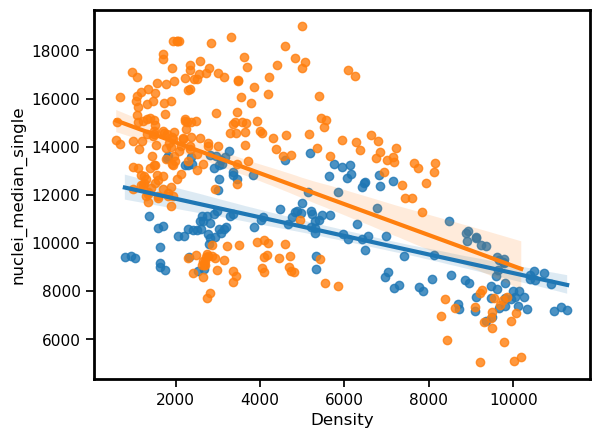

In [17]:
sns.regplot(data=all_wells_DF[all_wells_DF.drug_name == 'control'], x='Density', y='nuclei_median_single')
sns.regplot(data=all_wells_DF[all_wells_DF.drug_name == 'CGD'], x='Density', y='nuclei_median_single')

<AxesSubplot:xlabel='Density', ylabel='core_intensity'>

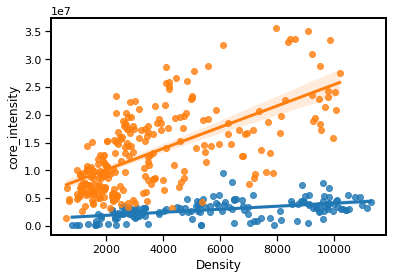

In [9]:
sns.regplot(data=all_wells_DF[all_wells_DF.drug_name == 'control'], x='Density', y='core_intensity')
sns.regplot(data=all_wells_DF[all_wells_DF.drug_name == 'CGD'], x='Density', y='core_intensity')

In [10]:
density_bin = all_wells_DF[all_wells_DF['drug_name']=='CGD'][all_wells_DF[all_wells_DF['drug_name']=='CGD'].Density.between(8000,10000)]

#density_bin[density_bin['accumulation'].between(3000,4000)]

In [11]:
represenative_pts = all_wells_DF[all_wells_DF['drug_name']=='CGD'].loc[[396, 84, 404]]

In [12]:
represenative_pts

,Unnamed: 0,File_ID,Original_File,additive_percent,date,drug_dose,drug_name,media,media_additive,media_phenol_red,neuclei_label_percent,original_location,px_size,target_type,time_step,volunteer_ID,Density,accumulation,nuclei_median_single,core_intensity
396,18,8,PMN-v337-CGD_5mill-mL_well2-accumulation.tif,0.4,20230419,NaN,CGD,RPMI,HSA,False,100,/Volumes/Samsung_T5/Main Data/2023/2023_04_19_...,1.2865,dead-canida,5,337,1390.633980,773.018849,13130.5,10150124.0
84,11,11,PMN-v338-CGD_5mill-mL_well5-accumulation.tif,0.4,20230419,NaN,CGD,RPMI,HSA,False,100,/Volumes/Samsung_T5/Main Data/2023/2023_04_19_...,1.2865,dead-canida,5,338,4727.821646,2227.397356,8851.0,19714694.0
404,4,9,PMN-v338-CGD_10mill-mL_well4-accumulation.tif,0.4,20230419,NaN,CGD,RPMI,HSA,False,100,/Volumes/Samsung_T5/Main Data/2023/2023_04_19_...,1.2865,dead-canida,5,338,9472.337577,3326.866250,6886.0,22908801.0


Text(0.5, 0, '')

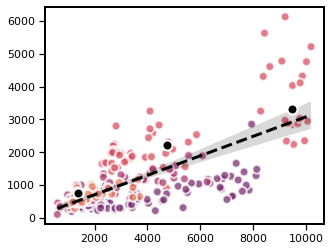

In [13]:
plt.figure(figsize=(5,4))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2, 'font.family': ['arial'], 'axes.linewidth':2})
sns.scatterplot(data=all_wells_DF[all_wells_DF['drug_name']=='CGD'], x='Density', y='accumulation', hue='volunteer_ID', palette=sns.color_palette('flare',4), s=75, linewidth=2, alpha=0.75, legend=False)
sns.regplot(data=all_wells_DF[all_wells_DF.drug_name == 'CGD'], y='accumulation', x='Density', scatter_kws={'alpha':0}, line_kws={'color':'black', 'linestyle':'--'})
sns.scatterplot(data = represenative_pts, x='Density', y='accumulation', s=100, linewidth=2, color='black', legend=False)
plt.ylabel('')
plt.xlabel('')
#plt.savefig("fig6-supplement_density-v-accumulation-cgd-volunteers.png", dpi=300, bbox_inches="tight")


In [15]:
only_CGD = all_wells_DF[all_wells_DF.drug_name == 'CGD']

only_CGD.volunteer_ID

0      348
1      348
2      348
3      348
4      348
      ... 
416    338
417    338
418    338
419    338
420    338
Name: volunteer_ID, Length: 253, dtype: int64

In [20]:
only_CGD = all_wells_DF[all_wells_DF.drug_name == 'CGD']
vol_num = 337
fit_xs = only_CGD[only_CGD.volunteer_ID == vol_num]['Density'].values
fit_xs = sm.add_constant(fit_xs)
fit_ys = only_CGD[only_CGD.volunteer_ID == vol_num]['accumulation'].values
model = sm.OLS(fit_ys,fit_xs)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     24.10
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           1.36e-05
Time:                        18:11:58   Log-Likelihood:                -290.86
No. Observations:                  45   AIC:                             585.7
Df Residuals:                      43   BIC:                             589.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        355.7300     67.395      5.278      0.0

In [104]:
all_wells_DF[all_wells_DF['drug_name']=='CGD'].volunteer_ID.unique()

array([348, 338, 340, 337])

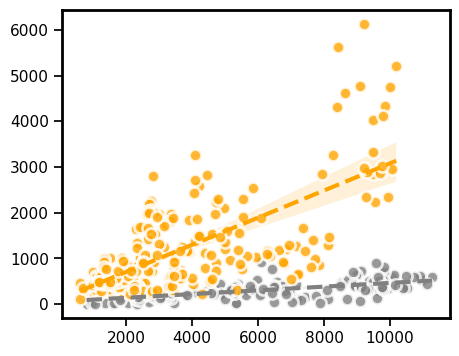

In [105]:
plt.figure(figsize=(5,4))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2, 'font.family': ['arial'], 'axes.linewidth':2})
#Plot the control case from day old blood
sns.regplot(data=all_wells_DF[all_wells_DF.drug_name == 'control'], y='accumulation', x='Density', scatter_kws={'alpha':0}, line_kws={'color':'grey', 'linestyle':'--'})
sns.scatterplot(data=all_wells_DF[all_wells_DF.drug_name == 'control'], y='accumulation', x='Density', color='grey', s=75, linewidth=2, alpha=0.8, legend=False)
#Plot the CGD case from day old blood
sns.regplot(data=all_wells_DF[all_wells_DF.drug_name == 'CGD'], y='accumulation', x='Density', scatter_kws={'alpha':0}, line_kws={'color':'orange', 'linestyle':'--'})
sns.scatterplot(data=all_wells_DF[all_wells_DF.drug_name == 'CGD'], y='accumulation', x='Density', color='orange', s=75, linewidth=2, alpha=0.8, legend=False)

plt.ylabel('')
plt.xlabel('')
plt.savefig("fig6_density-v-cells-control-v-cgd.png", dpi=300, bbox_inches="tight")

In [106]:
print("CGD Volunteer N: {}".format(all_wells_DF[all_wells_DF.drug_name == 'CGD'].volunteer_ID.nunique()))
print("CGD Target n: {}".format(len(all_wells_DF[all_wells_DF.drug_name == 'CGD'])))
print("DayOld Control Volunteer N: {}".format(all_wells_DF[all_wells_DF.drug_name == 'control'].volunteer_ID.nunique()))
print("DayOld Control Target n: {}".format(len(all_wells_DF[all_wells_DF.drug_name == 'control'])))


CGD Volunteer N: 4
CGD Target n: 253
DayOld Control Volunteer N: 3
DayOld Control Target n: 157


In [107]:
fit_xs = all_wells_DF[all_wells_DF.drug_name == 'CGD']['Density'].values
fit_xs = sm.add_constant(fit_xs)
fit_ys = all_wells_DF[all_wells_DF.drug_name == 'CGD']['accumulation'].values
model = sm.OLS(fit_ys,fit_xs)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     255.6
Date:                Mon, 15 May 2023   Prob (F-statistic):           3.76e-40
Time:                        18:17:14   Log-Likelihood:                -2024.1
No. Observations:                 253   AIC:                             4052.
Df Residuals:                     251   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.1727     81.050      1.372      0.1

In [177]:
fit_xs = all_wells_DF[all_wells_DF.drug_name == 'control']['Density'].values
fit_xs = sm.add_constant(fit_xs)
fit_ys = all_wells_DF[all_wells_DF.drug_name == 'control']['accumulation'].values
model = sm.OLS(fit_ys,fit_xs)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 15 May 2023   Prob (F-statistic):           3.14e-20
Time:                        19:01:36   Log-Likelihood:                -1001.5
No. Observations:                 157   AIC:                             2007.
Df Residuals:                     155   BIC:                             2013.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.1299     25.097      2.356      0.0

In [178]:
represenative_pts_ctrl =  all_wells_DF[all_wells_DF.drug_name == 'control'].loc[[231, 351, 308]]

In [179]:
represenative_pts_ctrl

,Unnamed: 0,File_ID,Original_File,additive_percent,date,drug_dose,drug_name,media,media_additive,media_phenol_red,neuclei_label_percent,original_location,px_size,target_type,time_step,volunteer_ID,Density,accumulation,nuclei_median_single,core_intensity
231,7,18,PMN-v341-control_2p5mill-mL_well6.tif,0.4,20230425,NaN,control,RPMI,HSA,False,100,/Volumes/Samsung_T5/Main Data/2023/2023_04_25_...,1.2865,dead-canida,5,341,2577.597677,200.991487,10924.0,2195631.0
351,14,5,PMN-v349-control_5mill-mL_well5.tif,0.4,20230503,NaN,control,RPMI,HSA,False,100,/Volumes/Samsung_T5/Main Data/2023/2023_05_03_...,1.2865,dead-canida,5,349,6148.505339,340.327799,12858.5,4376105.0
308,12,3,PMN-v349-control_10mill-mL_well4.tif,0.4,20230503,NaN,control,RPMI,HSA,False,100,/Volumes/Samsung_T5/Main Data/2023/2023_05_03_...,1.2865,dead-canida,5,349,8901.393014,450.687760,10082.0,4543834.0


NameError: name 'represenative_pts_ctrl' is not defined

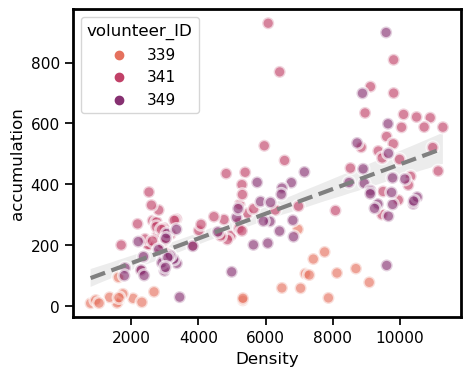

In [13]:
plt.figure(figsize=(5,4))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2, 'font.family': ['arial'], 'axes.linewidth':2})
#Plot the control case from day old blood
sns.regplot(data=all_wells_DF[all_wells_DF.drug_name == 'control'], y='accumulation', x='Density', scatter_kws={'alpha':0}, line_kws={'color':'grey', 'linestyle':'--'})
sns.scatterplot(data=all_wells_DF[all_wells_DF.drug_name == 'control'], y='accumulation', x='Density', hue='volunteer_ID', palette=sns.color_palette('flare',3), s=75, linewidth=2, alpha=0.65, legend=True)
#Plot the fresh blood control, also zstack analysis
sns.scatterplot(data = represenative_pts_ctrl, x='Density', y='accumulation', s=100, linewidth=2, color='black', legend=False)

plt.ylabel('')
plt.xlabel('')
#plt.savefig("fig6-supplement_density-v-accumulation-old-blood.png", dpi=300, bbox_inches="tight")


In [167]:
print("Fresh Volunteer N: {}".format(control_fig4_data.volunteer.nunique()))
print("Fresh Target n: {}".format(len(control_fig4_data)))
print("DayOld Control Volunteer N: {}".format(all_wells_DF[all_wells_DF.drug_name == 'control'].volunteer_ID.nunique()))
print("DayOld Control Target n: {}".format(len(all_wells_DF[all_wells_DF.drug_name == 'control'])))


Fresh Volunteer N: 4
Fresh Target n: 230
DayOld Control Volunteer N: 3
DayOld Control Target n: 157


In [168]:
fit_xs = control_fig4_data['measured_density'].dropna(axis=0).values
fit_xs = sm.add_constant(fit_xs)
fit_ys = control_fig4_data['cell_num'].dropna(axis=0).values
model = sm.OLS(fit_ys,fit_xs)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     54.22
Date:                Mon, 15 May 2023   Prob (F-statistic):           3.28e-12
Time:                        18:55:54   Log-Likelihood:                -1492.5
No. Observations:                 229   AIC:                             2989.
Df Residuals:                     227   BIC:                             2996.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        288.3215     27.131     10.627      0.0

In [21]:

density_bin_ctrl = all_wells_DF[all_wells_DF.drug_name == 'control'][all_wells_DF[all_wells_DF.drug_name == 'control'].Density.between(10000,11000)]

density_bin_ctrl[density_bin_ctrl['accumulation'].between(750,1000)]

,Unnamed: 0,File_ID,Original_File,additive_percent,date,drug_dose,drug_name,media,media_additive,media_phenol_red,neuclei_label_percent,original_location,px_size,target_type,time_step,volunteer_ID,Density,accumulation,nuclei_median_single,core_intensity
298,2,3,PMN-v349-control_10mill-mL_well4.tif,0.4,20230503,NaN,control,RPMI,HSA,False,100,/Volumes/Samsung_T5/Main Data/2023/2023_05_03_...,1.2865,dead-canida,5,349,10402.209278,842.486254,8384.5,7063826.0


In [10]:
rp_control_fresh_pts = control_fig4_data.loc[[95,165, 120]]

In [11]:
rp_control_fresh_pts

,Unnamed: 0,volunteer,seed_density,well_id,position,target_id,cell_num,target_size,cells_to_target,measured_density
95,95,5,3m,w3,p1,t2,355.437414,2924.57,0.121535,2451.790634
165,165,17,6m,w3,p3,t4,443.482499,2953.61,0.150149,6776.859504
120,120,17,10m,w1,p2,t3,596.664743,2325.62,0.256562,10863.177227


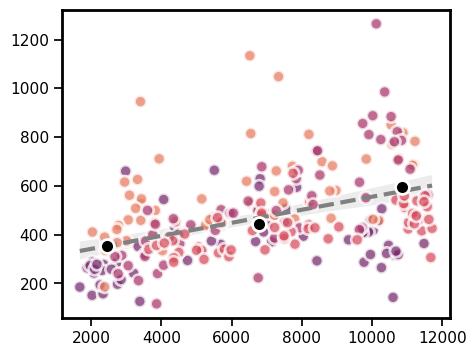

In [12]:

plt.figure(figsize=(5,4))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2, 'font.family': ['arial'], 'axes.linewidth':2})
#Plot the control case from day old blood
sns.regplot(data=control_fig4_data, y='cell_num', x='measured_density', scatter_kws={'alpha':0}, line_kws={'color':'grey', 'linestyle':'--'})
sns.scatterplot(data=control_fig4_data, y='cell_num', x='measured_density', hue='volunteer', palette=sns.color_palette('flare',4), s=75, linewidth=2, alpha=0.75, legend=False)
#Plot the fresh blood control, also zstack analysis
sns.scatterplot(data = rp_control_fresh_pts, x='measured_density', y='cell_num', s=100, linewidth=2, color='black', legend=False, zorder=100)

plt.ylabel('')
plt.xlabel('')
plt.savefig("fig6-supplement_density-v-accumulation-fresh-blood.png", dpi=300, bbox_inches="tight")


In [16]:
density_bin_ctrl = control_fig4_data[control_fig4_data.measured_density.between(9000,10000)]

density_bin_ctrl[density_bin_ctrl['cell_num'].between(500,600)]

,Unnamed: 0,volunteer,seed_density,well_id,position,target_id,cell_num,target_size,cells_to_target,measured_density
123,123,17,10m,w1,p3,t2,551.200541,2548.26,0.216305,9824.793388


In [ ]:
#Main Fig Ex: 179, 123